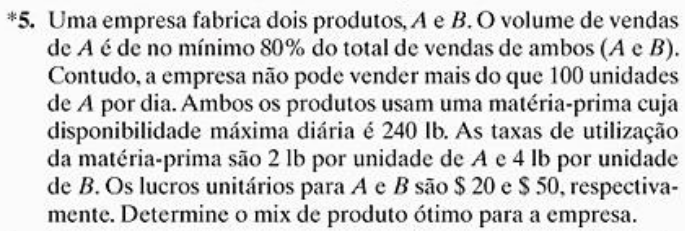

In [6]:
%pip install cplex
%pip install docplex

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [7]:
from docplex.mp.model import Model

model = Model('Mix_Otimo_Vendas_AB')

In [8]:
# Nomes dos produtos
produtos = ['A', 'B']

# Lucro unitário de cada produto
lucro_unitario = {'A': 20, 'B': 50}

# Taxa de utilização de matéria-prima (lb por unidade)
uso_materia_prima = {'A': 2, 'B': 4}

# Limites e condições
limite_vendas_A = 100
limite_materia_prima = 240

In [9]:
# 1. Variáveis de Decisão
# Quantidade a produzir/vender de cada produto
qtd = model.continuous_var_dict(produtos, name='Qtd')


# 2. Função Objetivo
# Maximizar o lucro total
expressao_lucro = (lucro_unitario[p] * qtd[p] for p in produtos)
soma_lucro_total = model.sum(expressao_lucro)
model.maximize(soma_lucro_total)


# 3. Restrições

# Restrição 1: Mix de Vendas (A >= 0.8 * (A + B)  =>  0.2A - 0.8B >= 0)
# Como não há soma, definimos a lógica da restrição diretamente
restr_mix_vendas_logica = 0.2 * qtd['A'] - 0.8 * qtd['B'] >= 0
model.add_constraint(restr_mix_vendas_logica, ctname='mix_vendas')

# Restrição 2: Limite de Vendas do Produto A
# Também não há soma aqui
restr_limite_vendas_a_logica = qtd['A'] <= limite_vendas_A
model.add_constraint(restr_limite_vendas_a_logica, ctname='limite_vendas_a')

# Restrição 3: Limite de Matéria-Prima
expressao_consumo_mp = (uso_materia_prima[p] * qtd[p] for p in produtos)
soma_consumo_mp = model.sum(expressao_consumo_mp)
restr_limite_mp_logica = soma_consumo_mp <= limite_materia_prima
model.add_constraint(restr_limite_mp_logica, ctname='limite_materia_prima')

docplex.mp.LinearConstraint[limite_materia_prima](2Qtd_A+4Qtd_B,LE,240)

In [10]:
# Define um tempo limite para o solver (opcional)
model.parameters.timelimit = 120

# Aciona o solver para encontrar a solução
print("--- Resolvendo o modelo ---")
solucao = model.solve(log_output=True)

print('\n------ SOLUÇÃO ÓTIMA ------\n')
print(solucao)

--- Resolvendo o modelo ---
Version identifier: 22.1.2.0 | 2024-12-10 | f4cec290b
CPXPARAM_Read_DataCheck                          1
CPXPARAM_TimeLimit                               120
Tried aggregator 1 time.
LP Presolve eliminated 1 rows and 0 columns.
Reduced LP has 2 rows, 2 columns, and 4 nonzeros.
Presolve time = 0.00 sec. (0.00 ticks)

Iteration log . . .
Iteration:     1   Scaled dual infeas =            10.000000

------ SOLUÇÃO ÓTIMA ------

solution for: Mix_Otimo_Vendas_AB
objective: 2600
status: OPTIMAL_SOLUTION(2)
Qtd_A=80.000
Qtd_B=20.000

